In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from non_linear_equations import draw_function

In [240]:
def lagrange_polynomial_f(x, n):
    x_points = np.linspace(-1, 1, n)
    # print(f"n={n}: {x_points}")
    y_points = f(x_points)
    n = len(x_points)
    accumulate_sum = 0
    for k in range(0, n):
        accumulate_product = 1
        for j in range(0, k):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        for j in range(k + 1, n):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        accumulate_sum += accumulate_product * y_points[k]
    return accumulate_sum

def new_func(x):
    return np.sin(np.sin(x))

def lagrange_polynomial_new_f(x, n):
    x_points = np.linspace(0, math.pi, n)
    y_points = new_func(x_points)
    n = len(x_points)
    accumulate_sum = 0
    for k in range(0, n):
        accumulate_product = 1
        for j in range(0, k):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        for j in range(k + 1, n):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        accumulate_sum += accumulate_product * y_points[k]
    return accumulate_sum

In [3]:
def f(x):
    return 1 / (1 + 25 * x ** 2)

In [135]:
def spline(x, y):
    a = [0.0 for _ in range(0, n)]
    b = [0.0 for _ in range(0, n)]
    c = [0.0 for _ in range(0, n)]
    d = [0.0 for _ in range(0, n)]
    # Инициализация массива сплайнов
    for i in range(0, n):
        a[i] = y[i]

    c[0] = 0.0
    c[n - 1] = 0.0

    alpha = [0.0 for _ in range(0, n - 1)]
    beta = [0.0 for _ in range(0, n - 1)]

    for i in range(1, n - 1):
        hi = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        C = 2.0 * (hi + hi1)
        B = hi1
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z

    for i in range(n - 2, 0, -1):
        c[i] = alpha[i] * c[i + 1] + beta[i]

    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        d[i] = (c[i] - c[i - 1]) / hi
        b[i] = hi * (2.0 * c[i] + c[i - 1]) / 6.0 + (y[i] - y[i - 1]) / hi
    return a, b, c, d

    return (a, b, c, d)

Left: -1.0 Right: -0.9487179487179487
Left: -0.9487179487179487 Right: -0.8974358974358975
Left: -0.8974358974358975 Right: -0.8461538461538461
Left: -0.8461538461538461 Right: -0.7948717948717949
Left: -0.7948717948717949 Right: -0.7435897435897436
Left: -0.7435897435897436 Right: -0.6923076923076923
Left: -0.6923076923076923 Right: -0.641025641025641
Left: -0.641025641025641 Right: -0.5897435897435898
Left: -0.5897435897435898 Right: -0.5384615384615385
Left: -0.5384615384615385 Right: -0.4871794871794872
Left: -0.4871794871794872 Right: -0.4358974358974359
Left: -0.4358974358974359 Right: -0.3846153846153846
Left: -0.3846153846153846 Right: -0.33333333333333337
Left: -0.33333333333333337 Right: -0.28205128205128205
Left: -0.28205128205128205 Right: -0.23076923076923084
Left: -0.23076923076923084 Right: -0.17948717948717952
Left: -0.17948717948717952 Right: -0.1282051282051282
Left: -0.1282051282051282 Right: -0.07692307692307698
Left: -0.07692307692307698 Right: -0.02564102564102566

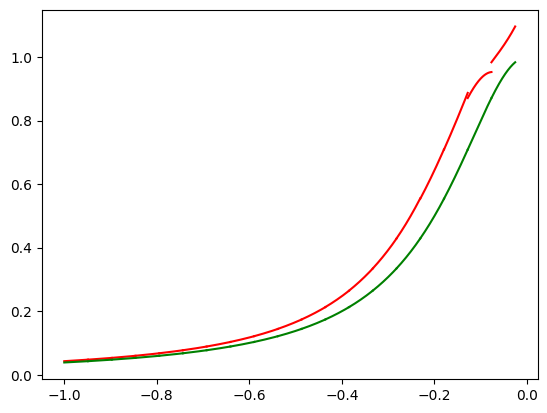

In [205]:
def inter_func(x, left):
     dx = x - left
     return a[i] + b[i] * dx + (c[i] / 2.0) * dx ** 2 + (d[i]/6) * dx ** 3
# incorrect work during small n
n = 20
left = -1
right = 1
x = np.linspace(left, right, 40)
y = f(x)
a,b,c,d = spline(x, y)
for i in range(1, n):
    left = x[i-1]
    right = x[i]
    print(f"Left: {left} Right: {right}")
    inner_segment = np.linspace(left, right, 200)
    plt.plot(inner_segment, inter_func(inner_segment, left), color='r', label="interpolated f(x)")
    plt.plot(inner_segment, f(inner_segment), color='g', label="f(x)")
# plt.legend()
plt.show()

In the middle between 0.0 and 0.05235987755982988
f(x) is equal to 0.8412857873002922
interpolated f(x) is equal to 0.839770334776285
In the middle between 0.05235987755982988 and 0.10471975511965977
f(x) is equal to 0.839801417578378
interpolated f(x) is equal to 0.83682663645262
In the middle between 0.10471975511965977 and 0.15707963267948966
f(x) is equal to 0.8368178864564784
interpolated f(x) is equal to 0.8323040730430299
In the middle between 0.15707963267948966 and 0.20943951023931953
f(x) is equal to 0.8323060248749113
interpolated f(x) is equal to 0.8262239857437519
In the middle between 0.20943951023931953 and 0.2617993877991494
f(x) is equal to 0.8262231104804754
interpolated f(x) is equal to 0.8185141582314391
In the middle between 0.2617993877991494 and 0.3141592653589793
f(x) is equal to 0.8185140922387794
interpolated f(x) is equal to 0.8091134215036955
In the middle between 0.3141592653589793 and 0.36651914291880916
f(x) is equal to 0.8091132010511167
interpolated f(x

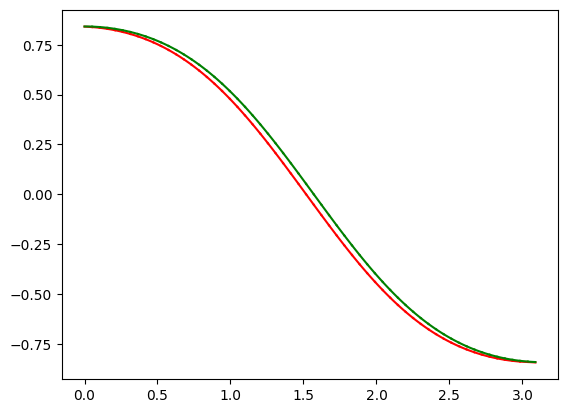

In [209]:
n = 60
left = 0
right = math.pi
x = np.linspace(left, right, 61)
y = new_func(x)
a,b,c,d = spline(x, y)
for i in range(1, n):
    left = x[i-1]
    right = x[i]
    print(f"In the middle between {left} and {right}")
    print(f"f(x) is equal to {new_func(left + (right-left)/2)}")
    print(f"interpolated f(x) is equal to {inter_func(left + (right-left)/2, left)}")
    inner_segment = np.linspace(left, right, 100)
    plt.plot(inner_segment, inter_func(inner_segment, left), color='r', label="interpolated f(x)")
    plt.plot(inner_segment, new_func(inner_segment), color='g', label="f(x)")
# plt.legend()
plt.show()


In [235]:
def calculates_middle_values(x, l_func, func):
    left = x[0]
    left_left = x[1]
    right = x[-2]
    right_right = x[-1]
    left_middle = left + (left_left - left) / 2
    right_middle = right + (right_right - right) / 2
    print(f"Ln in {left_middle} is equal to {l_func(left_middle, 20)}")
    print(f"f in {left_middle} is equal to {func(left_middle)}")
    print(f"Ln in {right_middle} is equal to {l_func(right_middle, 20)}")
    print(f"f in {right_middle} is equal to {func(right_middle)}")

n=20: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
n=5: [-1.  -0.5  0.   0.5  1. ]


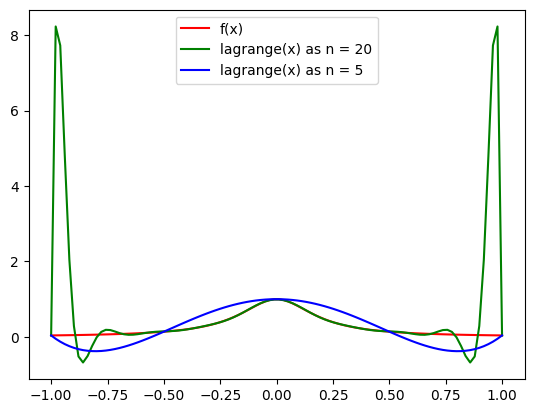

In [220]:
left = -1
right = 1
x = np.linspace(left, right, 100)
y = f(x)
lagrange_y_20 = lagrange_polynomial(x, 20)
lagrange_y_5 = lagrange_polynomial(x, 5)
plt.plot(x, y, color='r', label="f(x)")
plt.plot(x, lagrange_y_20, color='g', label="lagrange(x) as n = 20")
plt.plot(x, lagrange_y_5, color='b', label="lagrange(x) as n = 5")
plt.legend()
plt.show()

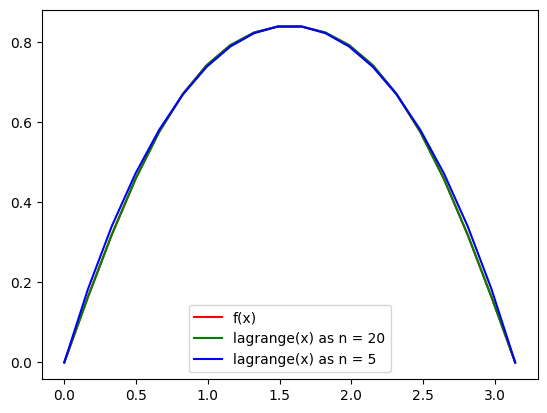

In [227]:
left = 0
right = math.pi
x = np.linspace(left, right, 20)
y = new_func(x)
lagrange_y_20 = lagrange_polynomial_new_f(x, 20)
lagrange_y_5 = lagrange_polynomial_new_f(x, 5)
plt.plot(x, y, color='r', label="f(x)")
plt.plot(x, lagrange_y_20, color='g', label="lagrange(x) as n = 20")
plt.plot(x, lagrange_y_5, color='b', label="lagrange(x) as n = 5")
plt.legend()
plt.show()

In [236]:
calculates_middle_values(x, lagrange_polynomial_new_f, new_func)

Ln in 0.08267349088394192 is equal to 0.08248549932417894
f in 0.08267349088394192 is equal to 0.0824855212492079
Ln in 3.058919162705851 is equal to 0.08248549932458972
f in 3.058919162705851 is equal to 0.08248552124920823


In [239]:
calculates_middle_values(x, lagrange_polynomial, f)

n=20: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
Ln in 0.08267349088394192 is equal to 0.8592577104031581
f in 0.08267349088394192 is equal to 0.8540638454343763
n=20: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
Ln in 3.058919162705851 is equal to -9341498384689.78
f in 3.058919162705851 is equal to 0.004256683803739207
